# Importing Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
df  = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')

#  Data Cleaning

In [27]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [29]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

# Note
Drop rows with missing essential data 
1) df.dropna(subset=['Sales', 'Profit', 'Product Name', 'Order Date'], inplace=True) -Note :  Removing "NA" Rows.
2) df['Discount'].fillna(data['Discount'].mean(), inplace=True) - Note : Filling - Average 

# Data type Changes 

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [31]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [33]:
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Week'] = df['Order Date'].dt.isocalendar().week


In [34]:
df[['Order Date', 'Day', 'Month', 'Month Name', 'Year', 'Week']].head()

,Order Date,Day,Month,Month Name,Year,Week
0,2016-11-08,8,11,November,2016,45
1,2016-11-08,8,11,November,2016,45
2,2016-06-12,12,6,June,2016,23
3,2015-10-11,11,10,October,2015,41
4,2015-10-11,11,10,October,2015,41


# Data Visualization

# 1) What is the trend of sales over time (e.g., by month, quarter, or year)?

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Day',
       'Month', 'Month Name', 'Year', 'Week'],
      dtype='object')

In [38]:
sales_trend = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [39]:
print(sales_trend)

    Year  Month        Sales
0   2014      1   14236.8950
1   2014      2    4519.8920
2   2014      3   55691.0090
3   2014      4   28295.3450
4   2014      5   23648.2870
5   2014      6   34595.1276
6   2014      7   33946.3930
7   2014      8   27909.4685
8   2014      9   81777.3508
9   2014     10   31453.3930
10  2014     11   78628.7167
11  2014     12   69545.6205
12  2015      1   18174.0756
13  2015      2   11951.4110
14  2015      3   38726.2520
15  2015      4   34195.2085
16  2015      5   30131.6865
17  2015      6   24797.2920
18  2015      7   28765.3250
19  2015      8   36898.3322
20  2015      9   64595.9180
21  2015     10   31404.9235
22  2015     11   75972.5635
23  2015     12   74919.5212
24  2016      1   18542.4910
25  2016      2   22978.8150
26  2016      3   51715.8750
27  2016      4   38750.0390
28  2016      5   56987.7280
29  2016      6   40344.5340
30  2016      7   39261.9630
31  2016      8   31115.3743
32  2016      9   73410.0249
33  2016     1

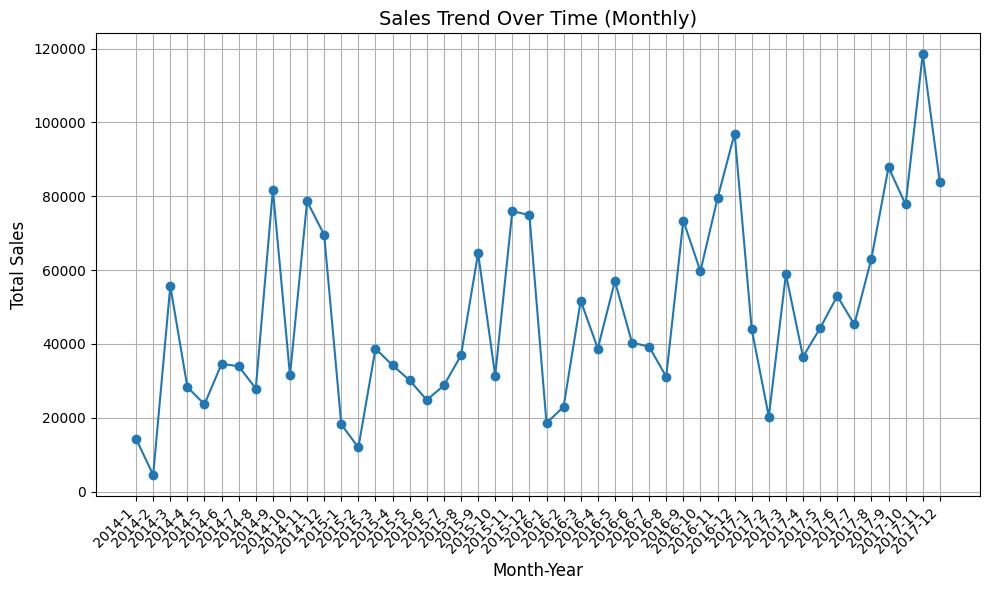

In [41]:
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str), sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time (Monthly)', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' is horizontal alignment (right-aligning the labels)
plt.tight_layout()  # Automatically adjust subplot parameters to give more space

plt.grid(True)
plt.show()

The monthly sales trend reveals a recurring pattern with consistent spikes toward the end of each year, particularly in November and December. This indicates strong seasonality, likely driven by holiday or end-of-year promotions. Periodic mid-year dips suggest slower demand cycles. Strategically ramping up inventory and marketing in Q4 can significantly boost annual revenue.

# 2) Which product categories and sub-categories are generating the most revenue?

In [43]:
# Group by category and sub-category to find total sales
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sort by sales in descending order
category_sales_sorted = category_sales.sort_values(by='Sales', ascending=False)


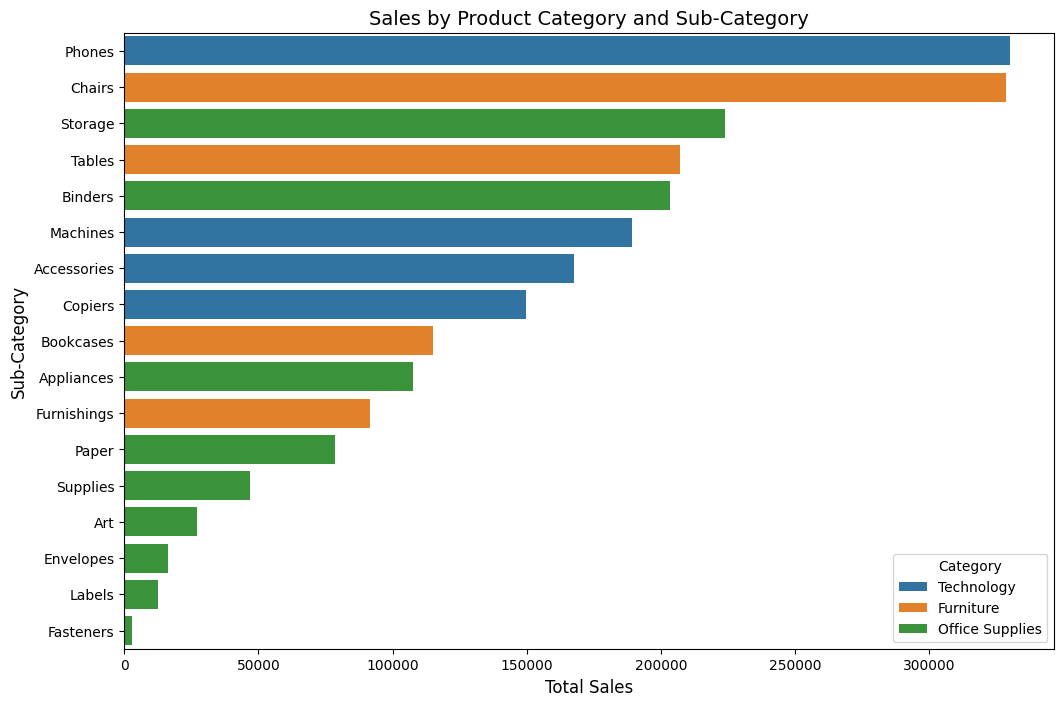

In [44]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(x='Sales', y='Sub-Category', data=category_sales_sorted, hue='Category', dodge=False)
plt.title('Sales by Product Category and Sub-Category', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.show()

Technology and Furniture categories dominate revenue, with sub-categories like Phones, Chairs, and Storage outperforming others. This suggests that customers value high-utility, high-ticket items. On the flip side, sub-categories like Fasteners and Labels barely contribute to sales. To maximize growth, focus on upselling popular categories and consider pruning low-performing SKUs.

# 3) What is the customer segmentation, and how does sales vary across different segments?

In [45]:
# Group by customer segment to find total sales
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Sort by sales in descending order
segment_sales_sorted = segment_sales.sort_values(by='Sales', ascending=False)


In [46]:
print(segment_sales_sorted)

       Segment         Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05


In [47]:
unique_segments = df['Segment'].unique()

In [48]:
print(unique_segments)

['Consumer' 'Corporate' 'Home Office']


In [49]:
# Group by customer segment to find total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Calculate the percentage of total sales for each segment
segment_sales['Sales Percentage'] = (segment_sales['Sales'] / segment_sales['Sales'].sum()) * 100


In [50]:
print(segment_sales)

       Segment         Sales  Sales Percentage
0     Consumer  1.161401e+06         50.557240
1    Corporate  7.061464e+05         30.739426
2  Home Office  4.296531e+05         18.703334


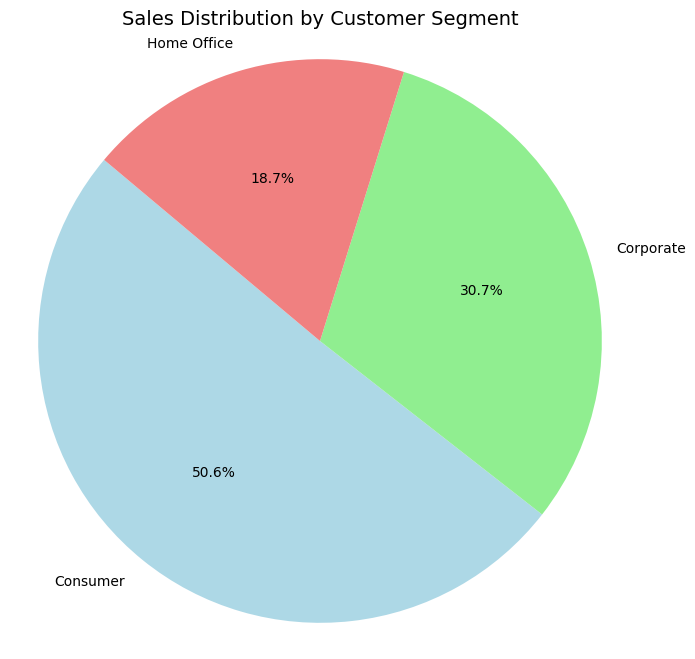

In [51]:
import matplotlib.pyplot as plt

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(segment_sales['Sales Percentage'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Sales Distribution by Customer Segment', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Consumers account for over 50% of total sales, making them the largest and most profitable customer segment. Corporate clients follow, while Home Office lags behind despite its potential. The business should maintain strong consumer engagement while creating tailored B2B strategies for Corporate and Home Office to unlock new revenue streams.

# 4) How do discounts impact sales and profitability?

In [52]:
# Calculate the relationship between discount and sales/profit
discount_sales_profit = df[['Discount', 'Sales', 'Profit']].groupby('Discount').sum().reset_index()


In [53]:
print(discount_sales_profit)

    Discount         Sales       Profit
0       0.00  1.087908e+06  320987.6032
1       0.10  5.436935e+04    9029.1770
2       0.15  2.755852e+04    1418.9915
3       0.20  7.645944e+05   90337.3060
4       0.30  1.032267e+05  -10369.2774
5       0.32  1.449346e+04   -2391.1377
6       0.40  1.164178e+05  -23057.0504
7       0.45  5.484974e+03   -2493.1111
8       0.50  5.891854e+04  -20506.4281
9       0.60  6.644700e+03   -5944.6552
10      0.70  4.062028e+04  -40075.3569
11      0.80  1.696376e+04  -30539.0392


In [56]:
# Grouping by 'Discount' and calculating average sales and profit
discount_sales = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Display the grouped data
discount_sales.head()


,Discount,Sales,Profit
0,0.00,226.742074,66.900292
1,0.10,578.397351,96.055074
2,0.15,529.971567,27.288298
3,0.20,209.076940,24.702572
4,0.30,454.742974,-45.679636


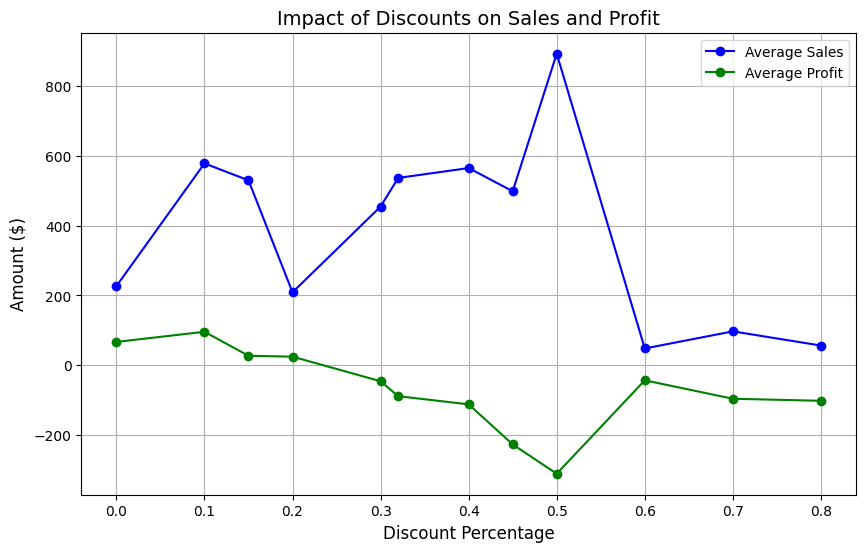

In [57]:
# Plotting the impact of discounts on sales and profit
plt.figure(figsize=(10,6))

# Plotting Sales vs Discount
plt.plot(discount_sales['Discount'], discount_sales['Sales'], label='Average Sales', color='blue', marker='o')

# Plotting Profit vs Discount
plt.plot(discount_sales['Discount'], discount_sales['Profit'], label='Average Profit', color='green', marker='o')

# Adding titles and labels
plt.title('Impact of Discounts on Sales and Profit', fontsize=14)
plt.xlabel('Discount Percentage', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


As discounts increase, sales initially grow but profits begin to fall, especially beyond 30–40%. At extreme discount levels, profits even turn negative, showing that deep discounts can be harmful. Light to moderate discounts boost sales, while heavy discounting erodes margins and long-term value. It is advisable to cap discounts around 20–30% and explore bundling or loyalty perks to drive volume without sacrificing profitability.

# 5) What is the relationship between the shipping mode and customer satisfaction (on-time delivery, for example)?

In [61]:
# Grouping by 'Ship Mode' to calculate average delivery time
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by 'Ship Mode' to calculate average delivery time
shipping_delivery = df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()

# Sorting by average delivery time in ascending order
shipping_delivery_sorted = shipping_delivery.sort_values(by='Delivery Time', ascending=True)

# Display the sorted data
print("Average Delivery Time by Shipping Mode (Sorted):")
print(shipping_delivery_sorted)


Average Delivery Time by Shipping Mode (Sorted):
        Ship Mode  Delivery Time
1        Same Day       0.044199
0     First Class       2.182705
2    Second Class       3.238046
3  Standard Class       5.006535


C:\Users\91868\AppData\Local\Temp\ipykernel_27492\4180165432.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




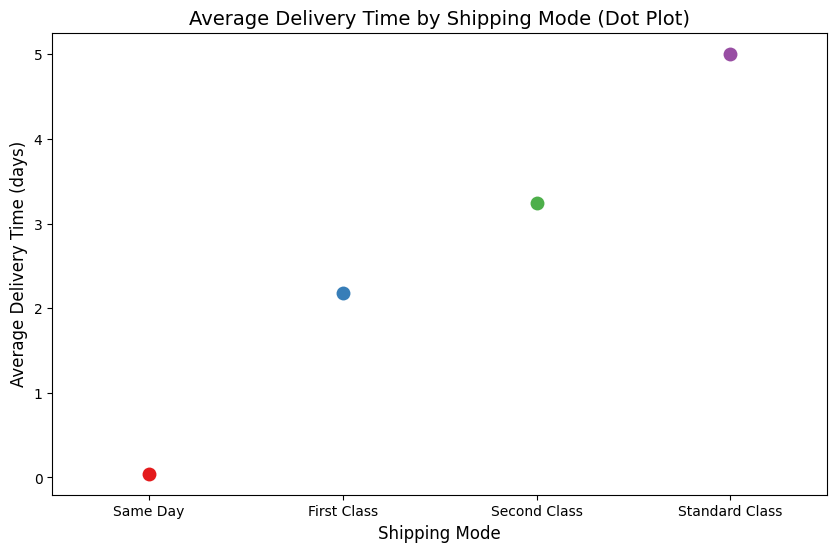

In [62]:
# Dot plot (Strip plot) to visualize individual delivery times by shipping mode
plt.figure(figsize=(10,6))
sns.stripplot(x='Ship Mode', y='Delivery Time', data=shipping_delivery_sorted, jitter=True, palette='Set1', size=10)

# Adding titles and labels
plt.title('Average Delivery Time by Shipping Mode (Dot Plot)', fontsize=14)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.show()


Shipping modes directly influence delivery speed—Same Day and First Class provide faster service, while Standard Class averages around 5 days. This can significantly affect customer satisfaction, especially for time-sensitive purchases. Optimizing logistics and promoting faster shipping options can enhance loyalty and reduce cart abandonment.

# 6) Which regions or states have the highest sales, and what factors contribute to regional performance differences?

In [65]:
# Group by region to find total sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Sort by sales in descending order
region_sales_sorted = region_sales.sort_values(by='Sales', ascending=False)


In [66]:
region_sales_sorted

,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


C:\Users\91868\AppData\Local\Temp\ipykernel_27492\2979385486.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




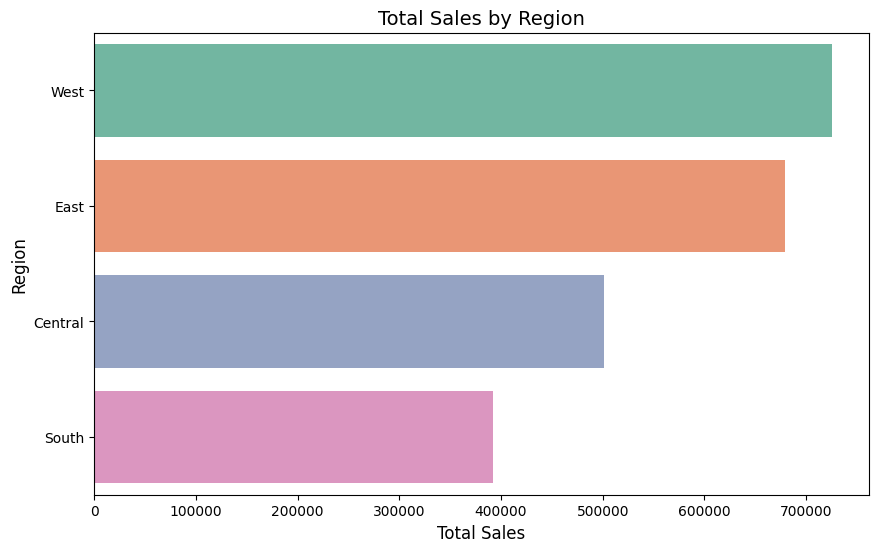

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='Region', data=region_sales_sorted, palette='Set2')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()


The West region leads in sales, closely followed by the East, while the South region generates the lowest. This geographic imbalance suggests market saturation in some areas and untapped opportunity in others. Businesses should allocate more resources to expand in the South and analyze regional preferences for targeted campaigns.

# Time Trend Analysis.
* What is the monthly/yearly sales growth pattern, and how does it correlate with profit margins?

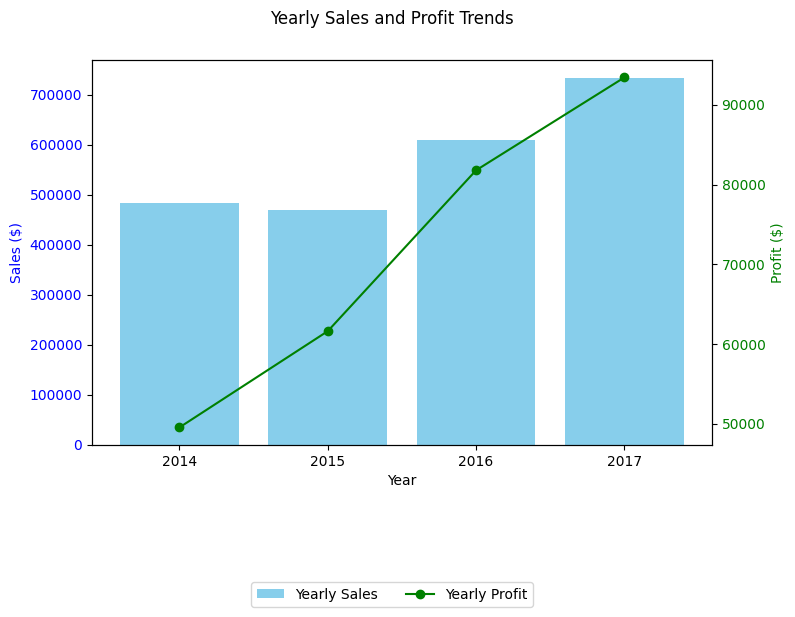

In [69]:
import matplotlib.pyplot as plt

# Grouping by 'Year' to calculate total sales and total profit
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()  # Sum of sales per year
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()  # Sum of profit per year

# Plotting yearly sales and profit trends
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for yearly sales
ax1.bar(yearly_sales['Year'], yearly_sales['Sales'], color='skyblue', label='Yearly Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(yearly_sales['Year'])  # Set x-axis to show only integer years

# Line chart for yearly profit
ax2 = ax1.twinx()
ax2.plot(yearly_profit['Year'], yearly_profit['Profit'], color='green', marker='o', label='Yearly Profit')
ax2.set_ylabel('Profit ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend adjustments
fig.suptitle('Yearly Sales and Profit Trends')
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)  # Move legend outside the box

# Show the chart
plt.show()


From 2014 to 2017, both sales and profits have steadily increased, with sharp acceleration in 2016 and 2017. Notably, profit growth outpaced sales growth, indicating improved cost efficiency or margin optimization. This trend suggests strong financial health and validates investments made during this period—momentum should be maintained with continuous innovation.

# Product Performance
Which products/categories have the highest sales volume but lowest profitability, and why

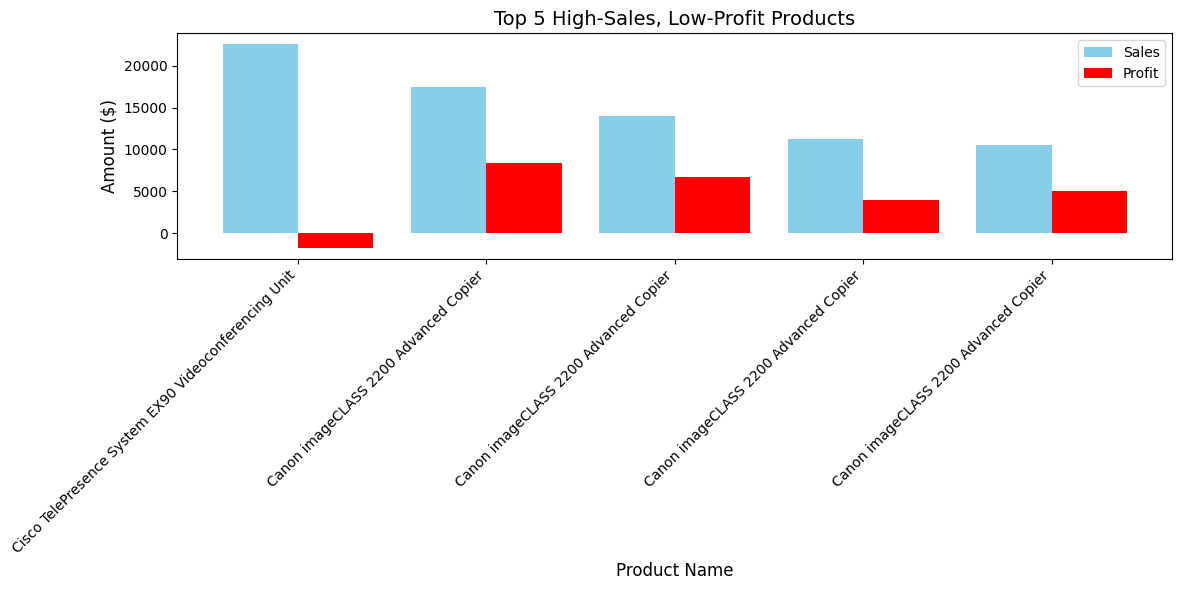

In [70]:


# Assuming your dataframe is named 'df' and has columns: 'Product Name', 'Sales', and 'Profit'
# Sorting the data to get top 5 high-sales, low-profit products
top_5_products = df.sort_values(by='Sales', ascending=False).head(5)

# Plot Sales vs Profit for top 5 products
plt.figure(figsize=(12, 6))  # Adjust figure size
bar_width = 0.4
x = range(len(top_5_products['Product Name']))

# Plot Sales bars
plt.bar(x, top_5_products['Sales'], width=bar_width, color='skyblue', label='Sales')

# Plot Profit bars
plt.bar([i + bar_width for i in x], top_5_products['Profit'], width=bar_width, color='red', label='Profit')

# Add labels and title
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Top 5 High-Sales, Low-Profit Products', fontsize=14)

# Adjust x-axis labels
plt.xticks([i + bar_width / 2 for i in x], top_5_products['Product Name'], rotation=45, ha='right')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


Products like Cisco’s video units and Canon copiers show high sales but poor or negative profits, likely due to high cost structures, deep discounting, or servicing issues. These are red flags for hidden operational inefficiencies. It’s crucial to reevaluate pricing, supplier contracts, or even discontinue underperforming SKUs to protect overall margins.

Project By Dharmesh Parmar
Email : Dhparmar2119@gmail.com